In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
titanic_data = pd.read_csv('/content/Titanic-Dataset (1).csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


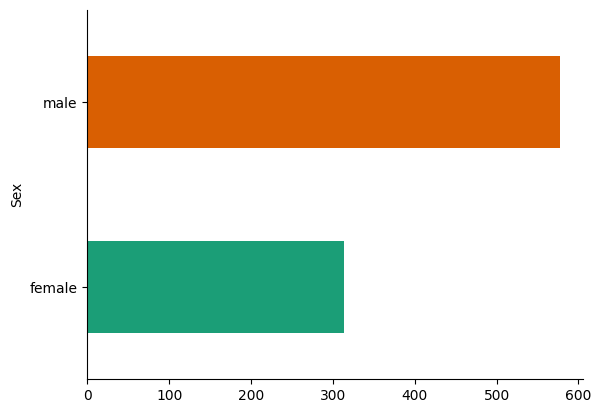

In [5]:
# @title Sex

from matplotlib import pyplot as plt
import seaborn as sns
titanic_data.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

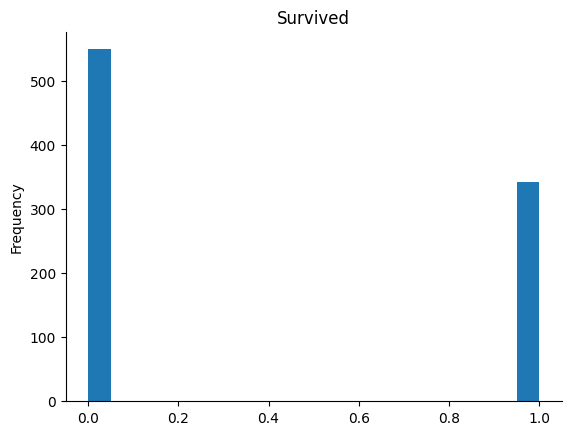

In [4]:
# @title Survived

from matplotlib import pyplot as plt
titanic_data['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
titanic_data.shape

(891, 12)

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
missing_values_df = (titanic_data.isnull().sum() / len(titanic_data)) * 100
print(missing_values_df.to_frame('Percentage Missing').sort_values(by='Percentage Missing', ascending=False))

             Percentage Missing
Age                   19.865320
Embarked               0.224467
PassengerId            0.000000
Survived               0.000000
Pclass                 0.000000
Name                   0.000000
Sex                    0.000000
SibSp                  0.000000
Parch                  0.000000
Ticket                 0.000000
Fare                   0.000000


In [17]:
!pip install scikit-learn
#Import the pipeline class from the sklearn.pipeline module
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

categorical_features = ['Sex', 'Embarked', 'Title', 'IsAlone']
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [20]:
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)]
)

In [22]:
# Assuming that 'titanic_data' is the DataFrame you want to work with
df_train = titanic_data.copy()

print(df_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [27]:
# Assuming that 'titanic_data' is the DataFrame you want to work with
df_train = titanic_data.copy()

# Add the missing columns to df_train
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_train['IsAlone'] = 0
df_train.loc[df_train['FamilySize'] == 1, 'IsAlone'] = 1


print(df_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  FamilySize     IsAlone  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    1.904602    0.602694  
std      0.806057   49.693429    1.613459    0.489615  
min      0.000000    0.000000    1.000000    0.000000  
25%      0.000000    7.910400    1.000000    0.000000  
50%      0.000000   14.454200    

In [30]:
# Assuming 'df_train' from your previous code contains the features and target variable
# 'Survived' is assumed to be the target variable

# Separate features (X) and target variable (y)
X = df_train.drop('Survived', axis=1)  # Features
y = df_train['Survived']  # Target variable

# Now you can split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

In [32]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare',
                                                                          'FamilySize']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'Embarked',
                                                                          'Title',
                                                                          'IsAlone'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [33]:
best_model = grid_search.best_estimator_

In [34]:
y_pred = best_model.predict(X_val)


In [35]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print("Accuracy:", accuracy," - ",round(accuracy*100,2),"%")
print("Precision:", precision," - ",round(precision*100,2),"%")
print("Recall:", recall," - ",round(recall*100,2),"%")
print("F1 Score:", f1," - ",round(f1*100,2),"%")
print("Classification Report:\n", classification_rep)

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", cv_scores.mean())

Accuracy: 0.8268156424581006  -  82.68 %
Precision: 0.8115942028985508  -  81.16 %
Recall: 0.7567567567567568  -  75.68 %
F1 Score: 0.7832167832167832  -  78.32 %
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Cross-validation Accuracy: 0.8293829640323895
